In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [3]:
file_path = "Result/Traffic_Collision_Data_2016.csv"
collision_2016 = pd.DataFrame(pd.read_csv(file_path))
collision_2016.head()

,Date Occurred,Time Occurred,Area ID,Area Name,Victim Age,Address,Cross Street,Location,Date in Full,Day of Week,Year,Date
0,01/03/2016,1950,12,77th Street,39.0,VERNON AV,HOOVER ST,"(34.0037, -118.2878)",2016-01-03,Sunday,2016,1/3
1,02/05/2016,1835,1,Central,44.0,HOPE,3RD,"(34.0525, -118.2535)",2016-02-05,Friday,2016,2/5
2,10/20/2016,950,1,Central,46.0,5TH,MAIN,"(34.0471, -118.2491)",2016-10-20,Thursday,2016,10/20
3,10/20/2016,1216,1,Central,53.0,HILL,8TH,"(34.0467, -118.252)",2016-10-20,Thursday,2016,10/20
4,03/29/2016,1445,3,Southwest,27.0,BUDLONG,ADAMS,"(34.0328, -118.2964)",2016-03-29,Tuesday,2016,3/29


In [3]:
mon_collision = collision_2016[collision_2016["Day of Week"]=="Monday"]
tue_collision = collision_2016[collision_2016["Day of Week"]=="Tuesday"]
wed_collision = collision_2016[collision_2016["Day of Week"]=="Wednesday"]
thu_collision = collision_2016[collision_2016["Day of Week"]=="Thursday"]
fri_collision = collision_2016[collision_2016["Day of Week"]=="Friday"]
sat_collision = collision_2016[collision_2016["Day of Week"]=="Saturday"]
sun_collision = collision_2016[collision_2016["Day of Week"]=="Sunday"]

In [4]:
mon_perday = pd.DataFrame(mon_collision.groupby("Date Occurred")["Area ID"].count()).reset_index()
mon_perday=mon_perday.rename(columns={"Area ID":"Accident Count"})
mon_list = mon_perday["Accident Count"]

tue_perday = pd.DataFrame(tue_collision.groupby("Date Occurred")["Area ID"].count()).reset_index()
tue_perday=tue_perday.rename(columns={"Area ID":"Accident Count"})
tue_list = tue_perday["Accident Count"]

wed_perday = pd.DataFrame(wed_collision.groupby("Date Occurred")["Area ID"].count()).reset_index()
wed_perday=wed_perday.rename(columns={"Area ID":"Accident Count"})
wed_list = wed_perday["Accident Count"]

thu_perday = pd.DataFrame(thu_collision.groupby("Date Occurred")["Area ID"].count()).reset_index()
thu_perday=thu_perday.rename(columns={"Area ID":"Accident Count"})
thu_list = thu_perday["Accident Count"]

fri_perday = pd.DataFrame(fri_collision.groupby("Date Occurred")["Area ID"].count()).reset_index()
fri_perday=fri_perday.rename(columns={"Area ID":"Accident Count"})
fri_list = fri_perday["Accident Count"]

sat_perday = pd.DataFrame(sat_collision.groupby("Date Occurred")["Area ID"].count()).reset_index()
sat_perday=sat_perday.rename(columns={"Area ID":"Accident Count"})
sat_list = sat_perday["Accident Count"]

sun_perday = pd.DataFrame(mon_collision.groupby("Date Occurred")["Area ID"].count()).reset_index()
sun_perday=sun_perday.rename(columns={"Area ID":"Accident Count"})
sun_list = sun_perday["Accident Count"]


In [5]:
average_accident_weekday = [mon_list.mean(),tue_list.mean(),wed_list.mean(),thu_list.mean(),fri_list.mean(),sat_list.mean(),sun_list.mean()]
average_accident_weekday

[149.94230769230768,
 153.28846153846155,
 157.69230769230768,
 156.21153846153845,
 167.58490566037736,
 153.35849056603774,
 149.94230769230768]

<IPython.core.display.Javascript object>


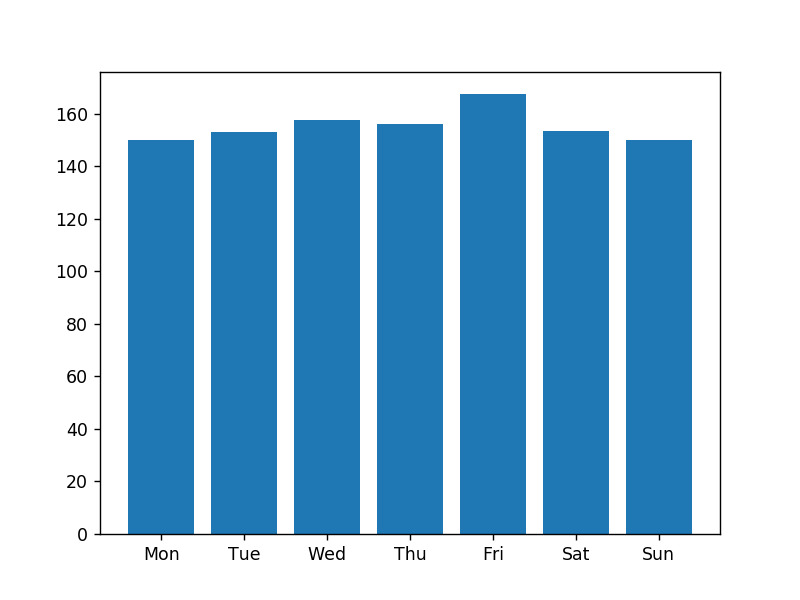

<BarContainer object of 7 artists>

In [9]:
weekday_label = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.bar(weekday_label, average_accident_weekday)

<IPython.core.display.Javascript object>


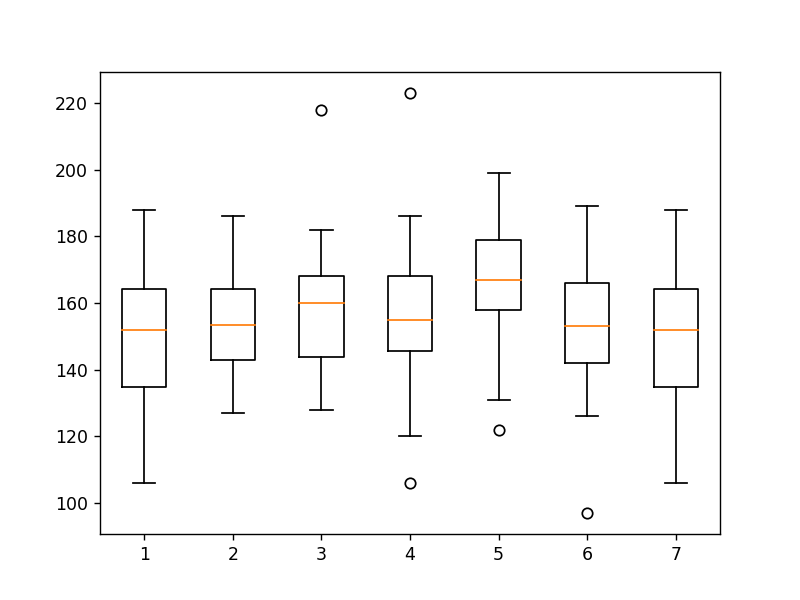

{'whiskers': [<matplotlib.lines.Line2D at 0x1de763be710>,
 'caps': [<matplotlib.lines.Line2D at 0x1de763befd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de763b6630>,
 'medians': [<matplotlib.lines.Line2D at 0x1de763c0860>,
 'fliers': [<matplotlib.lines.Line2D at 0x1de763c0c88>,
 'means': []}

In [10]:
test_list=[mon_list,tue_list,wed_list,thu_list,fri_list,sat_list,sun_list]
plt.boxplot(test_list)

In [12]:
stats.f_oneway(mon_list,tue_list,wed_list,thu_list,fri_list,sat_list,sun_list)

F_onewayResult(statistic=6.216958476743736, pvalue=3.174958611900618e-06)